In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline


# the switching binomial generative model


## likelihood function

In [2]:
import bayesianchangepoint as bcp
help(bcp.likelihood)

Help on function likelihood in module bayesianchangepoint.bcp:

likelihood(o, p, r)
    Knowing p and r, the likelihood of observing o is that of a binomial of
    
        - mean rate of chosing hypothesis "o=1" = (p*r + o)/(r+1)
        - number of choices where  "o=1" equals to p*r+1
    
    since both likelihood sum to 1, the likelihood of drawing o in {0, 1}
    is equal to



In [3]:
for p_ in [0, .25, .5, .75, 1]:
    for r in (2**np.arange(5)-1):
        print('Knowing p=', p_, 'and r=', r, ', the likelihood for 0=', bcp.likelihood(0, p_, r), ', for 1=', bcp.likelihood(1, p_, r), ', sum=', bcp.likelihood(0, p_, r)+bcp.likelihood(1, p_, r))

Knowing p= 0 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0 and r= 1 , the likelihood for 0= 0.8 , for 1= 0.2 , sum= 1.0
Knowing p= 0 and r= 3 , the likelihood for 0= 0.9045936395759717 , for 1= 0.09540636042402827 , sum= 1.0
Knowing p= 0 and r= 7 , the likelihood for 0= 0.9532098019182014 , for 1= 0.04679019808179863 , sum= 1.0
Knowing p= 0 and r= 15 , the likelihood for 0= 0.976812163875552 , for 1= 0.023187836124448087 , sum= 1.0000000000000002
Knowing p= 0.25 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0.25 and r= 1 , the likelihood for 0= 0.6386676768158934 , for 1= 0.3613323231841066 , sum= 1.0
Knowing p= 0.25 and r= 3 , the likelihood for 0= 0.6923111756016641 , for 1= 0.30768882439833595 , sum= 1.0
Knowing p= 0.25 and r= 7 , the likelihood for 0= 0.7201814563014943 , for 1= 0.2798185436985056 , sum= 1.0
Knowing p= 0.25 and r= 15 , the likelihood for 0= 0.7347677771670017 , for 1= 0.26523222283299835 , sum= 1.0
Knowing p= 0.

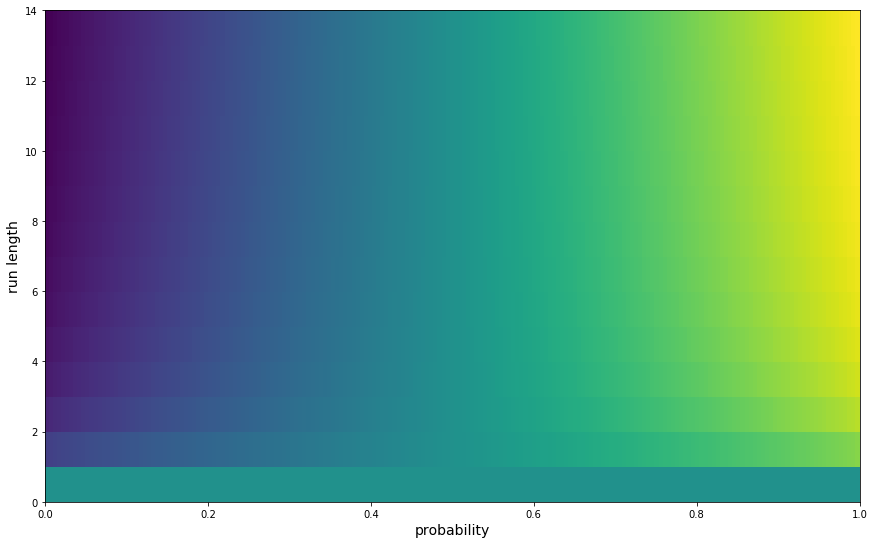

In [4]:
fig_width= fig_width
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180), sharex=True)

p, r = np.meshgrid(np.linspace(0., 1., 200, endpoint=True), np.arange(15))

L = bcp.likelihood(o=1, p=p, r=r)

CS = ax.pcolormesh(p, r, L)

fig.tight_layout()
ax.set_ylabel('run length', fontsize=14)
#axs[i_layer].axis('tight')
ax.set_xlabel('probability', fontsize=14);

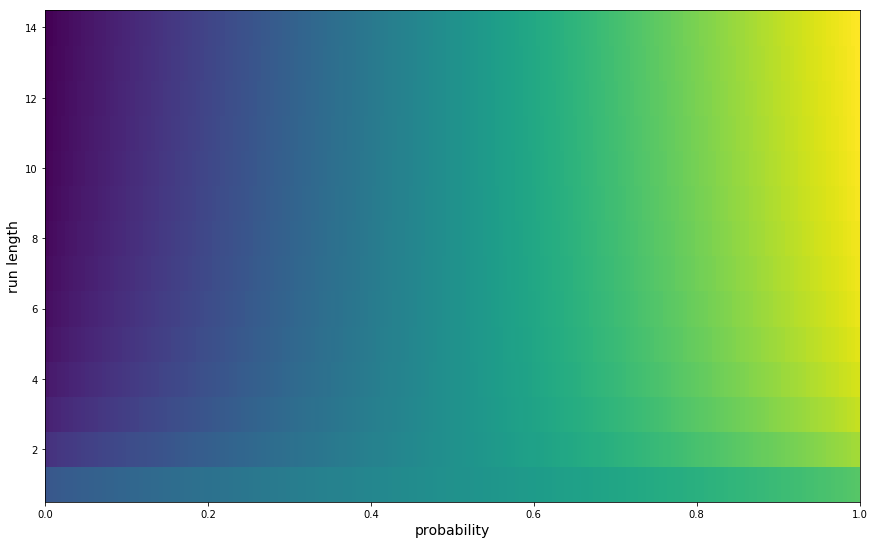

In [5]:
fig_width= fig_width
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180), sharex=True)

p, r = np.meshgrid(np.linspace(0., 1., 200, endpoint=True), np.arange(15)+.5)

L = bcp.likelihood(o=1, p=p, r=r)

CS = ax.pcolormesh(p, r, L)

fig.tight_layout()
ax.set_ylabel('run length', fontsize=14)
#axs[i_layer].axis('tight')
ax.set_xlabel('probability', fontsize=14);

In [6]:
print(L)

[[0.2779263  0.28202285 0.28544789 ... 0.71455211 0.71797715 0.7220737 ]
 [0.15676086 0.16324733 0.16848918 ... 0.83151082 0.83675267 0.84323914]
 [0.10968687 0.11690424 0.1226625  ... 0.8773375  0.88309576 0.89031313]
 ...
 [0.02752626 0.03484876 0.04065331 ... 0.95934669 0.96515124 0.97247374]
 [0.0256096  0.03288292 0.03865727 ... 0.96134273 0.96711708 0.9743904 ]
 [0.02394253 0.03116816 0.03691378 ... 0.96308622 0.96883184 0.97605747]]


## performing inference: application to synthetic data

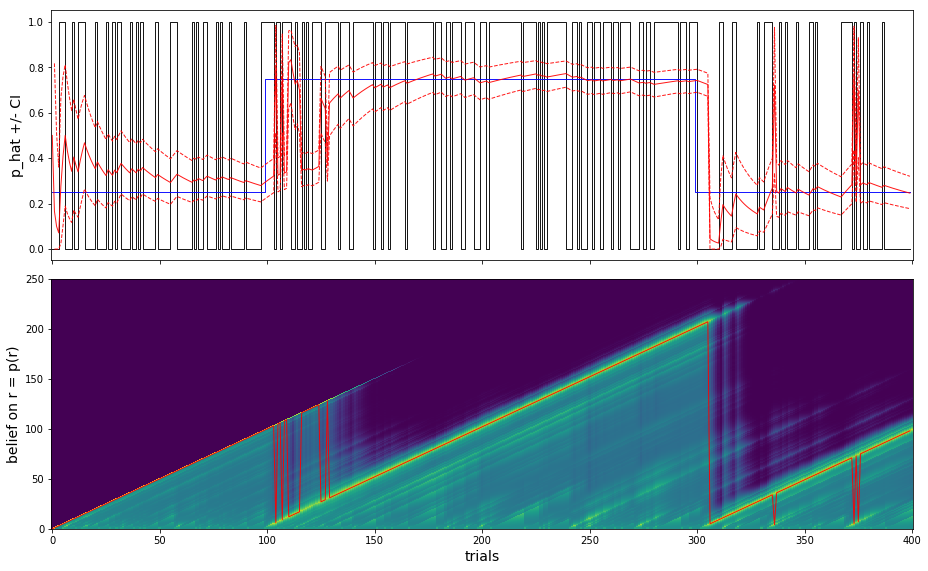

In [7]:
T = 400
mode = 'max'
p_gen = .25 * np.ones(T)
p_gen[100:300] = .75
np.random.seed(42)
o = 1 * (p_gen > np.random.rand(T))

p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)

## different read-outs

The full Bayesian models provides with a probabilistic representation of the pdf of $p$ for all possible run-length values. 
Instead of using the expectation (as above), one could use another readout mode, such as to take the run-length with maximal probability:

In [8]:
p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)

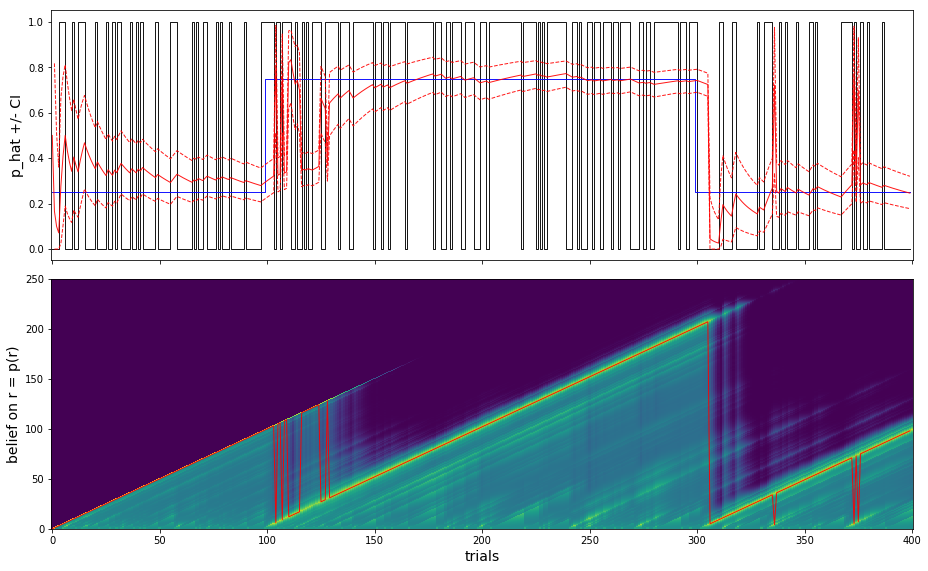

In [9]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='max')

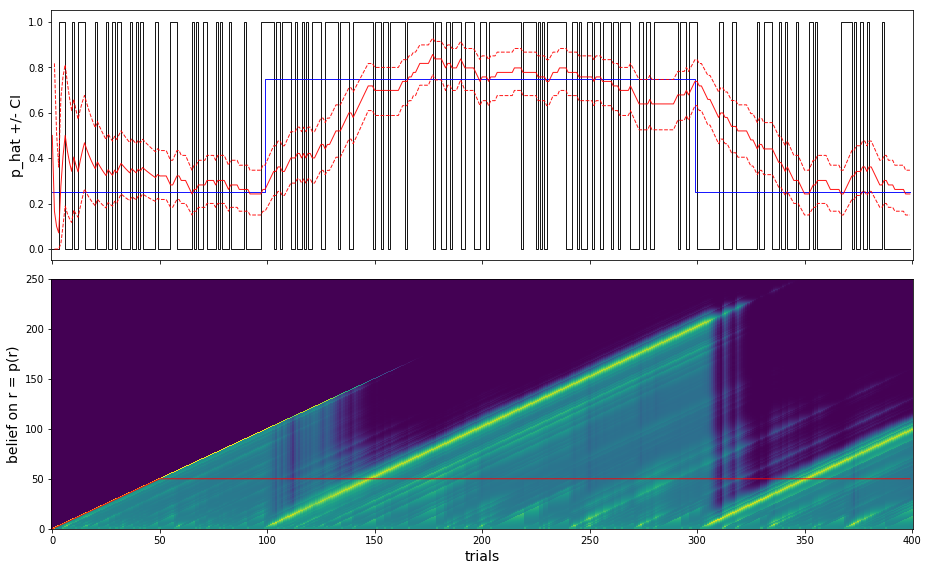

In [10]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='fixed', fixed_window_size=50)

## testing different hazard rates

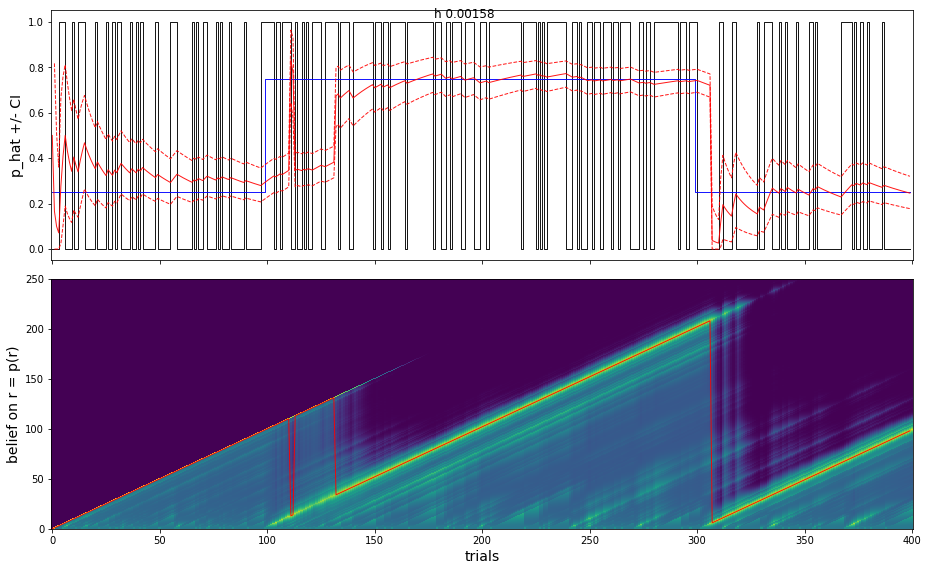

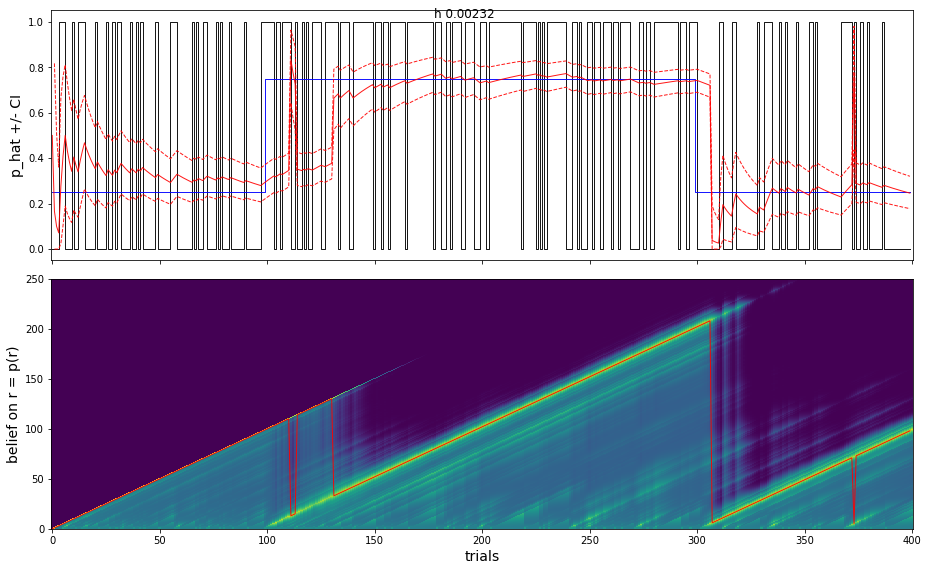

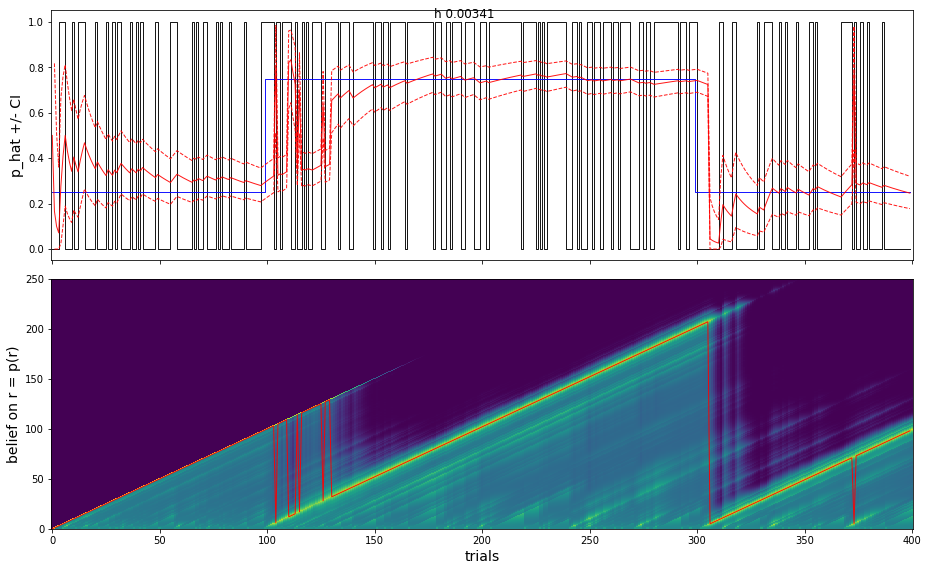

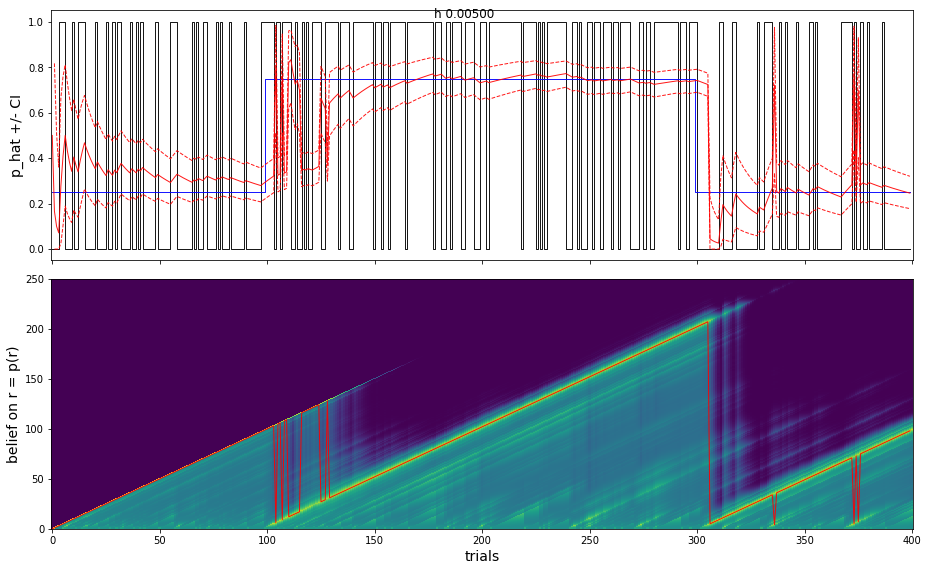

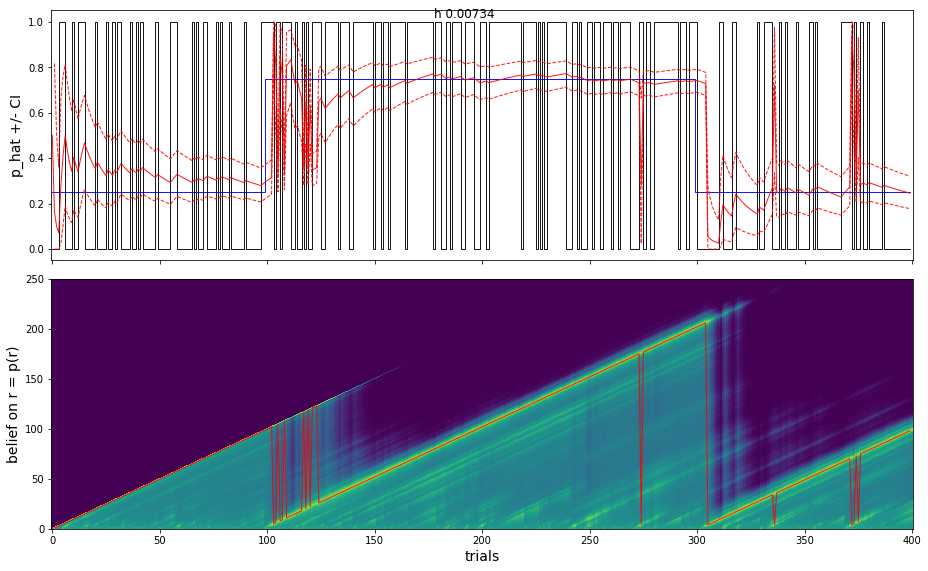

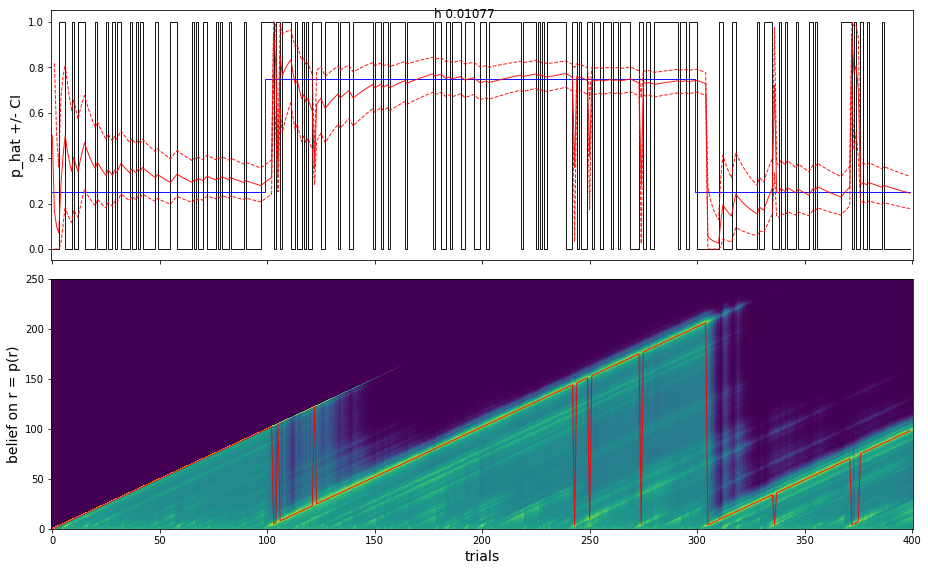

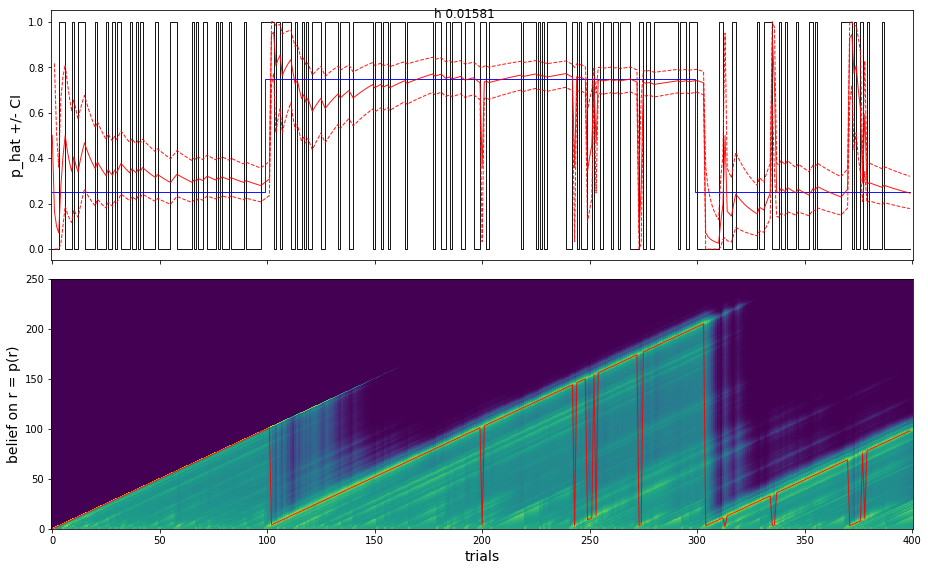

In [11]:
hs = 1/200*np.logspace(-.5, .5, 7)
for h_ in hs:
    p_bar, r, beliefs = bcp.inference(o, h=h_, p0=.5)
    fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)
    fig.suptitle('h %.5f' % h_)
    plt.show()